#GMDL 222 -  PS 1 - Introduction to PyTorch and Deep Learning
## Resources
- [Deep Learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) 
- [Using Pytorch and Cuda for Large Computation in Google Colabs](https://medium.com/analytics-vidhya/using-pytorch-and-cuda-for-large-computation-in-google-colabs-f1c026c17673)
- [Notes On Deep Learning Theory, Part 1: The Data-Generating Process](https://medium.com/@stepanulyanin/notes-on-deep-learning-theory-part-1-data-generating-process-31fdda2c8941)

In [9]:
import numpy as np 
import torch

# Part 1: Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other specialized hardware to accelerate computing. If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along in this quick API walkthrough.



### Tensor Initialization


In [10]:
# Directly from data
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

In [11]:
# From a NumPy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)


In [12]:
# built-in torch functions
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.4796, 0.3986, 0.0653],
        [0.1864, 0.2973, 0.3904]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [13]:
# From another tensor:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")
# With random or constant values:
x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.7771, 0.7675],
        [0.1423, 0.4430]]) 



### Tensor Attributes
Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [14]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")


Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [15]:
print(f"tensor.view, similar to np.array.reshape: {tensor.view(6,-1).shape}")
print(f"tensor.reshape: {tensor.reshape(6,-1).shape}")

tensor.view, similar to np.array.reshape: torch.Size([6, 2])
tensor.reshape: torch.Size([6, 2])


In [16]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


In [17]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[0.7652, 0.0087, 0.8985, 0.0284],
        [0.2876, 0.0766, 0.3996, 0.4889],
        [0.3272, 0.0798, 0.3812, 0.0801]], device='cuda:0') 

tensor * tensor 
 tensor([[0.7652, 0.0087, 0.8985, 0.0284],
        [0.2876, 0.0766, 0.3996, 0.4889],
        [0.3272, 0.0798, 0.3812, 0.0801]], device='cuda:0')


### Bridge with NumPy


In [18]:
# Tensor to NumPy array

t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [19]:
# NumPy array to Tensor
n = np.ones(5)
t = torch.from_numpy(n)
print(f"t: {t}")
print(f"n: {n}")


t: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
n: [1. 1. 1. 1. 1.]


### Computation speed

In [20]:
%%time
b = np.random.randn(10000,10000)
result = np.matmul(b,b)
del b, result

CPU times: user 1min 32s, sys: 765 ms, total: 1min 33s
Wall time: 50.2 s


In [21]:
%%time
y = torch.randn(10000,10000)
result = torch.matmul(y,y)
del y, result

CPU times: user 22.6 s, sys: 43.8 ms, total: 22.6 s
Wall time: 23.7 s


In [22]:
%%time
x = torch.randn(10000,10000).cuda()
result = torch.matmul(x,x)
del x, result

CPU times: user 745 ms, sys: 4.04 ms, total: 749 ms
Wall time: 760 ms


## For Loops vs Vectorized
Example taken from [this](https://www.kaggle.com/code/yushg123/for-loops-vs-vectorized-who-wins-and-by-how-much?scriptVersionId=33908645&cellId=25) wonderful Kaggle notebook 

In [23]:
import pandas as pd 
import time
import matplotlib.pyplot as plt

In [24]:
sizes = [10, 100, 1000, 10000, 100000, 1000000]
complexity = pd.DataFrame(columns=['sizes', 'for_loop', 'numpy'])
complexity['sizes'] = sizes

In [25]:
for_loops = []
numpy = []
# Well... this for-loop here doesn't count! 
for size in sizes:
    v1 = np.random.rand(size, 1)
    v2 = np.random.rand(size, 1)
    
    #For loop implementation
    start = time.process_time()
    product = 0

    for i in range(len(v1)):
        product += v1[i] * v2[i]

    end = time.process_time()
    
    for_loops.append(1000*(end-start))
    
    #Vectorized implementation
    
    start = time.process_time()
    product = 0

    product = np.dot(v1.T, v2)

    end = time.process_time()
    numpy.append(1000*(end - start))
    

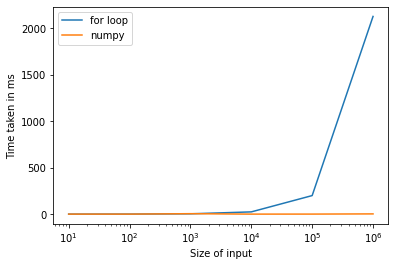

In [26]:
complexity['for_loops'] = for_loops
complexity['numpy'] = numpy

plt.plot(complexity['sizes'], complexity['for_loops'])
plt.plot(complexity['sizes'], complexity['numpy'])

plt.xscale(value='log')
plt.xlabel("Size of input")
plt.ylabel("Time taken in ms")
plt.legend(['for loop', 'numpy'])
plt.show()

# Part 2: Working with Images
 - PIL
 - Matplotlib
 - PyTorch




In [27]:
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [28]:
import matplotlib.pyplot as plt 
from torchvision import transforms
from PIL import Image

def img_info(x):
  print("img min:", x.min())
  print("img max:", x.max())
  print("img shape", x.shape)


## Matplotlib

In [29]:
dir = 'gdrive/My Drive/GMDL222/DeepLearning/'
img_path = dir + "img1.jpg"
img = plt.imread(img_path)
plt.imshow(img)

FileNotFoundError: ignored

In [ ]:
print("Loading image via plt.imread:")
img_info(img)


## PIL Image

In [ ]:
img_pil = Image.open(img_path)
img_pil

In [ ]:
print(img_pil)

In [ ]:
# note: we convert the pil image to numpy array
print("Loading image via PIL Image.open:")
img_info(np.asarray(img_pil))


## PyTorch ToTensor()
Convert a PIL Image or numpy.ndarray to tensor. This transform does not support torchscript.

Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8

In the other cases, tensors are returned without scaling.

In [ ]:
# note we init ToTensor() and call it at the same line
img_tensor = transforms.ToTensor()(img_pil)
img_info(img_tensor)


# Part 3 - Spiral example
Inspired by [Stanford CS231n: Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/neural-networks-case-study/), we will solve a spiral classification probelm

In [30]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
from tqdm import tqdm

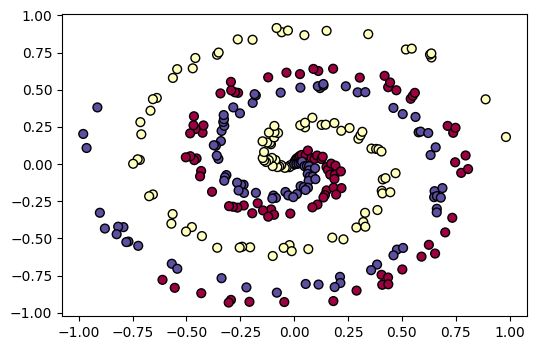

In [34]:
plt.figure(dpi=100)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='black')
plt.show()


## Model #1 - SoftMax Classifier

\begin{equation}
=exp^{(Wx+b)}/Z 
\end{equation}

In [ ]:
# Last layer is logSoftmax. loss is Negative-log liklihood (see discussion at Part 4)
criterion = nn.NLLLoss() 
device = "cuda"
# torch data
X_train, y_train = torch.Tensor(X).to(device), torch.Tensor(y).to(device).long()
# for decision boundary
xs = torch.linspace(-2, 2, steps=100)
ys = torch.linspace(-2, 2, steps=100)
xx_m, yy_m = torch.meshgrid(xs, ys, indexing='xy')
xx, yy = xx_m.ravel(), yy_m.ravel()
xy_coord = torch.stack([xx, yy], dim=1)

# for plot
xx_m, yy_m = xx_m.numpy(), yy_m.numpy()
xy_coord.shape

In [ ]:
def train_spiral_model(model, X, y, optimizer, criterion):
  # train 
  for epoch in tqdm(range(1000)):
    # no batches, predict the entire set
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()

In [ ]:
input_size = D # (x,y)
output_size = K
device = "cuda"
softmax_model = nn.Sequential(nn.Linear(input_size, output_size
                                ),
                      # LogSoftmax + negative log liklihood loss
                      # OR linear + CrossEntropy loss
                      nn.LogSoftmax(dim=1))
softmax_model = softmax_model.to(device)

softmax_optimizer = optim.SGD(softmax_model.parameters(), lr=1, weight_decay=0.001)
# train for 1000 epochs
train_spiral_model(softmax_model, X_train, y_train, softmax_optimizer, criterion)

Softmax classifier accruacy: 0.5033333333333333


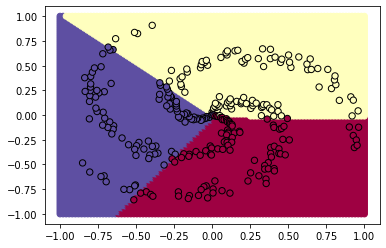

In [ ]:
y_pred = softmax_model(X_train).detach().cpu().numpy()
y_pred = np.argmax(y_pred, axis=1)
print("Softmax classifier accruacy:", np.mean(y_pred == y))
# lets visualize the data:
decision_bound = softmax_model(xy_coord.to(device)).detach().cpu().numpy()
decision_bound = np.argmax(decision_bound, axis=1)
plt.scatter(xx_m, yy_m, c=decision_bound, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap=plt.cm.Spectral, edgecolors='black')
plt.show()


## Model #2 - MLP

In [ ]:
# Compare with 1 layer model with 100 neurons
hidden_size = 10
mlp_model = nn.Sequential(nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, output_size),
                      nn.LogSoftmax(dim=1))
mlp_model = mlp_model.to(device)

mlp_optimizer = optim.SGD(mlp_model.parameters(), lr=1, weight_decay=0.001)
# train for 1000 epochs
train_spiral_model(mlp_model, X_train, y_train, mlp_optimizer, criterion)

100%|██████████| 1000/1000 [00:00<00:00, 1030.36it/s]


MLP classifier accruacy: 0.9366666666666666


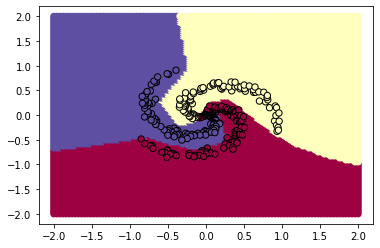

In [ ]:
y_pred = mlp_model(X_train).detach().cpu().numpy()
y_pred = np.argmax(y_pred, axis=1)
print("MLP classifier accruacy:", np.mean(y_pred == y))
# lets visualize the data:
decision_bound = mlp_model(xy_coord.to(device)).detach().cpu().numpy()
decision_bound = np.argmax(decision_bound, axis=1)
plt.scatter(xx_m, yy_m, c=decision_bound, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap=plt.cm.Spectral, edgecolors='black')
plt.show()


# Part 4: Deep learning MNIST Example

## Data

In [ ]:
# Torch/PIL transformations which are applied to each image in the dataset
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

batch_size = 64

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# get a single batch
dataiter = iter(trainloader)
images, labels = dataiter.next()

print("64 images batch, 1*28*28 image size each:", images.shape)
print("64 array of labels", labels.shape)
print("labels for example:", labels)

64 images batch, 1*28*28 image size each: torch.Size([64, 1, 28, 28])
64 array of labels torch.Size([64])
labels for example: tensor([3, 7, 5, 7, 0, 9, 4, 2, 2, 2, 4, 8, 0, 1, 9, 3, 1, 3, 6, 4, 4, 6, 2, 2,
        2, 2, 0, 8, 4, 8, 7, 3, 0, 3, 0, 5, 3, 8, 7, 7, 1, 7, 1, 0, 2, 1, 6, 1,
        4, 3, 9, 8, 6, 2, 2, 8, 0, 6, 3, 5, 7, 1, 6, 5])


the label is: tensor(3)


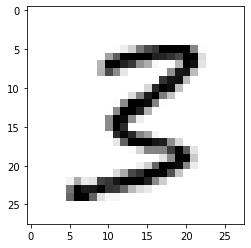

In [ ]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')
print("the label is:", labels[0])

tensor([[7, 5, 7, 0, 9, 4, 2, 2, 2, 4],
        [8, 0, 1, 9, 3, 1, 3, 6, 4, 4],
        [6, 2, 2, 2, 2, 0, 8, 4, 8, 7],
        [3, 0, 3, 0, 5, 3, 8, 7, 7, 1],
        [7, 1, 0, 2, 1, 6, 1, 4, 3, 9],
        [8, 6, 2, 2, 8, 0, 6, 3, 5, 7]])
------------------------------------------------


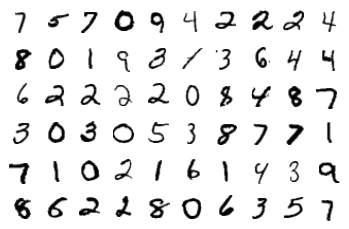

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')
print(labels[1:61].reshape((6,10)))
print("------------------------------------------------")

## Our Model - Fully-Connected (FC) Network
1.   The input is 28*28 = 784 nodes
2.   Hidden layer 1 contains 128 nodes with relu activation function.
3.   Hidden layer 2 contains 64 nodes with relu activation function.
4.   The output layer - (log)softmax with 10 classes, 0-9.



In [ ]:
# Two ways to specify our network
# The short way:

input_size = 784
hidden_sizes = [128, 64]
output_size = 10
device = "cuda"
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      # LogSoftmax + negative log liklihood loss
                      # OR linear + CrossEntropy loss
                      nn.LogSoftmax(dim=1))
model = model.to(device)
print(model)
print("Model's device:", next(model.parameters()).device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
Model's device: cuda:0



## Cross Entropy (CE) loss vs. Negative log-liklihood (NLL)
**TL;DR**: Use either LogSoftmax + NLL or linear + CE
### CrossEntropy Loss
* Shapes: input (N,C), targets (N)
* The input/preds is expected to contain raw, unnormalized scores for each class (output of the last FC layer).
* The performance of this criterion is generally better when target contains class indices (i.e., not one-hot encoded).
 
### Negative log likelihood
* Shapes: input (N,C), targets (N)
* Obtaining log-probabilities in a neural network is easily achieved by adding a **LogSoftmax layer** in the last layer of your network.
* You may use **CrossEntropyLoss** instead, if you prefer not to add an extra layer.


### A word about nn.LogSoftmax():
While mathematically equivalent to log(softmax(x)), in PyTorch, doing these two operations separately is slower and numerically unstable

In [ ]:
# another way to print our model outline + #parameters
from torchsummary import summary
summary(model, input_size=(1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 128]         100,480
              ReLU-2               [-1, 1, 128]               0
            Linear-3                [-1, 1, 64]           8,256
              ReLU-4                [-1, 1, 64]               0
            Linear-5                [-1, 1, 10]             650
        LogSoftmax-6                [-1, 1, 10]               0
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.42
Estimated Total Size (MB): 0.42
----------------------------------------------------------------


In [ ]:
# The long but more organized way (for very large architectures)
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.input = nn.Linear(input_size, hidden_sizes[0])
      self.hidden1 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
      self.hidden2 = nn.Linear(hidden_sizes[1], output_size)

    # x represents our data
    def forward(self, x):
      x = self.input(x)
      x = F.relu(x)
      x = self.hidden1(x)
      x = F.relu(x)
      # sometimes refered to as 'logits'
      x = self.hidden2(x)
      output = F.log_softmax(x, dim=1)
      return output
      

In [ ]:
net_long = Net().to(device)
summary(net_long, input_size=(1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 128]         100,480
            Linear-2                [-1, 1, 64]           8,256
            Linear-3                [-1, 1, 10]             650
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.42
Estimated Total Size (MB): 0.42
----------------------------------------------------------------


## Optimization and Loss
- We will specify our loss function, cross-entropy, and optimizer; this time, we choose stochastic gradient descent (we will also use mini-batches). 
- We will use Stochastic Gradient descent (SGD) with Momentum:

\begin{equation}
\Delta w_{i}:=\alpha\Delta w_{i-1}-\eta\nabla w \\
w:= w + \Delta w_{i}
\end{equation}

where $\alpha$ is the momentum/decay factor



In [ ]:
# Last layer is logSoftmax. loss is NLL
criterion = nn.NLLLoss() 
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)

## Training

In [ ]:
def train_model(model, trainloader, optimizer):
  for epoch in range(5):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data
          inputs = inputs.view(inputs.shape[0], -1)
          # mode to device/cuda
          inputs, labels = inputs.to(device), labels.to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 100 == 1:    # print every 100 mini-batches
              print('epoch: %2d, minibatch: %2d, loss: %.3f' %
                    (epoch + 1, i / 100, running_loss / 100))
              running_loss = 0.0

  print('Finished Training')

In [ ]:
train_model(model, trainloader, optimizer)

epoch:  1, minibatch:  0, loss: 0.047
epoch:  1, minibatch:  1, loss: 2.021
epoch:  1, minibatch:  2, loss: 0.977
epoch:  1, minibatch:  3, loss: 0.579
epoch:  1, minibatch:  4, loss: 0.445
epoch:  1, minibatch:  5, loss: 0.413
epoch:  1, minibatch:  6, loss: 0.401
epoch:  1, minibatch:  7, loss: 0.354
epoch:  1, minibatch:  8, loss: 0.338
epoch:  1, minibatch:  9, loss: 0.338
epoch:  2, minibatch:  0, loss: 0.006
epoch:  2, minibatch:  1, loss: 0.303
epoch:  2, minibatch:  2, loss: 0.309
epoch:  2, minibatch:  3, loss: 0.308
epoch:  2, minibatch:  4, loss: 0.309
epoch:  2, minibatch:  5, loss: 0.285
epoch:  2, minibatch:  6, loss: 0.284
epoch:  2, minibatch:  7, loss: 0.267
epoch:  2, minibatch:  8, loss: 0.258
epoch:  2, minibatch:  9, loss: 0.269
epoch:  3, minibatch:  0, loss: 0.007
epoch:  3, minibatch:  1, loss: 0.246
epoch:  3, minibatch:  2, loss: 0.237
epoch:  3, minibatch:  3, loss: 0.235
epoch:  3, minibatch:  4, loss: 0.242
epoch:  3, minibatch:  5, loss: 0.208
epoch:  3, m

Save the model we trained! so we wouldn't have to rerun it next time!

In [ ]:
PATH = './MNIST_classification_net.pth'
torch.save(model.state_dict(), PATH)

## Evaluation

In [ ]:
# The test set looks the same as the train test!
dataiter = iter(testloader)

tensor([[2, 1, 0, 4, 1, 4, 9, 5, 9, 0],
        [6, 9, 0, 1, 5, 9, 7, 3, 4, 9],
        [6, 6, 5, 4, 0, 7, 4, 0, 1, 3],
        [1, 3, 4, 7, 2, 7, 1, 2, 1, 1],
        [7, 4, 2, 3, 5, 1, 2, 4, 4, 6],
        [3, 5, 5, 6, 0, 4, 1, 9, 5, 7]])
------------------------------------------------


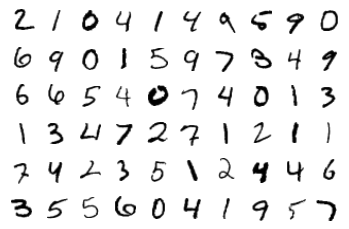

In [ ]:
images, labels = dataiter.next()
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')
print(labels[1:61].reshape((6,10)))
print("------------------------------------------------")

Load network weights via load_state_dict

In [ ]:
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
input = images.view(images.shape[0], -1).to(device)
outputs = torch.exp(model(input))

original label: 5
predicted labels: 6
------------------------------------------------


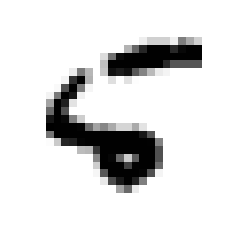

In [ ]:
figure = plt.figure()
index = 8
plt.axis('off')
plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

print("original label:", labels[index].item())
print("predicted labels:", outputs[index].argmax().item())
print("------------------------------------------------")

In [ ]:
correct_count, all_count = 0, 0
for images,labels in testloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784).to(device)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps).detach().cpu().numpy()
    probab = list(ps[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9571
